# BOSS直聘数据分析

## 1、数据清洗

### 1.1 查看数据，查看数据的缺失值、重复值处理、异常值<br>
关键数据列：职位名称、薪资、工作地点、经验要求、学历要求、职位描述、公司规模、公司行业

#### 1.1.1 安装必要的库

In [15]:
#!pip install -U ydata-profiling # 描述性分析
!pip install wordcloud matplotlib #云图
!pip install jieba #中文分词

# 设置显示所有行的选项
import pandas as pd
pd.set_option('display.max_rows', None)

#解决kaggle中文显示乱码
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Path to the custom font
font_path = '/kaggle/input/chinese-fonts/NotoSansSC-VariableFont_wght.ttf'

# Add the custom font to the font manager
font_manager.fontManager.addfont(font_path)

# After adding the font, search for it by filename to get the correct font name
for font in font_manager.fontManager.ttflist:
    if font.fname == font_path:
        print(f"Found font: {font.name}")
        plt.rcParams['font.family'] = font.name
        break

Found font: Noto Sans SC


#### 1.1.2 读取数据文件

In [16]:
import re
import pandas as pd

# 读取Excel文件
df = pd.read_excel("/kaggle/input/boss-zhipin-sample-data/BOSS_Zhipin_Sample_Data.xlsx")

# 显示前几行数据
print(df.head())

  发布城市       城市代码                                               职位链接  \
0   北京  101010100  https://www.zhipin.com/job_detail/a93aa4c3b597...   
1   北京  101010100  https://www.zhipin.com/job_detail/c49e5ef36818...   
2   北京  101010100  https://www.zhipin.com/job_detail/5a8dd742d630...   
3   北京  101010100  https://www.zhipin.com/job_detail/15b961c17d60...   
4   北京  101010100  https://www.zhipin.com/job_detail/676af5373033...   

             职位名称          薪资 工作地点   经验要求  学历要求  公司名称  \
0  开发测试工程师（服务端方向）  20-35K·16薪   北京   1-3年    本科    百度   
1         婚礼宴会设计师       8-12K   北京   1-3年    本科  皓跃北禾   
2     京东日结工 400/天       8-13K   北京   经验不限  学历不限   渌源达   
3       资深游戏界面设计师  30-60K·14薪   北京  5-10年  学历不限  琥珀创想   
4            品牌营销  20-35K·14薪   北京   3-5年    本科   猿辅导   

                                                薪资详情  \
0                                                NaN   
1                                                NaN   
2  薪资范围：8000-13000元/月, 发薪日期：25日, 社保类型：意外险, 提成方式：按...   


#### 1.1.3 显示数据描述信息

In [17]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109986 entries, 0 to 109985
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   发布城市    109986 non-null  object
 1   城市代码    109986 non-null  int64 
 2   职位链接    109986 non-null  object
 3   职位名称    109901 non-null  object
 4   薪资      109949 non-null  object
 5   工作地点    109839 non-null  object
 6   经验要求    109954 non-null  object
 7   学历要求    109957 non-null  object
 8   公司名称    109961 non-null  object
 9   薪资详情    42938 non-null   object
 10  职位关键字   102437 non-null  object
 11  职位描述    109898 non-null  object
 12  职位福利    66154 non-null   object
 13  融资情况    54104 non-null   object
 14  公司规模    109970 non-null  object
 15  公司行业    109970 non-null  object
dtypes: int64(1), object(15)
memory usage: 13.4+ MB
None


#### 1.1.4 查看关键列的描述性分析

In [18]:
# 查看各列列的描述分析

#description = df['职位名称'].describe()
description = df['薪资'].describe()
#description = df['工作地点'].describe()
#description = df['经验要求'].describe()
#description = df['学历要求'].describe()
#description = df['职位描述'].describe()
#description = df['公司规模'].describe()
#description = df['公司行业'].describe()
print(description)

# 查找关键列的空值情况
#empty_rows = df[df['职位名称'].isnull()]
empty_rows = df[df['薪资'].isnull()]
#empty_rows = df[df['工作地点'].isnull()]
#empty_rows = df[df['经验要求'].isnull()]
#empty_rows = df[df['学历要求'].isnull()]
#empty_rows = df[df['职位描述'].isnull()]
#empty_rows = df[df['公司规模'].isnull()]
#empty_rows = df[df['公司行业'].isnull()]
# 打印结果
#print(empty_rows)
#print(empty_rows['发布城市'].unique())
#print(len(empty_rows['发布城市'].unique()))

# 经查看，空值可能为爬取数据时，没有爬取成功，之后可重新爬取，然后将剩余的空值删除

count     109949
unique      1863
top         3-4K
freq        9286
Name: 薪资, dtype: object


#### 1.1.5 查看是否有重复行，数据中无重复行无需处理

In [19]:
# 检查所有列的重复行
duplicate_rows = df[df.duplicated()]

# 打印重复行
print(len(duplicate_rows))

0


### 1.2 清洗数据

#### 1.2.1 删除“薪资”列中，包含“元/单”“面议”等无法用于分析的数据

In [20]:
# 删除包含“元/单”的行
df = df[~df['薪资'].str.contains('元/单|面议', na=False)]

# 删除 '薪资' 列为空值的行
df.dropna(subset=['薪资'], inplace=True)

# 删除 '工作地点' 列为空值的行
df.dropna(subset=['工作地点'], inplace=True)

# 删除 '工作地点' 列为空值的行
df.dropna(subset=['工作地点'], inplace=True)

# 删除'职位描述'中包含“兼职”的行
#df = df[~df['职位描述'].str.contains('兼职|日结', na=False)]

# 删除'职位描述'中包含“兼职”的行
df = df[~df['薪资'].str.contains('元/时', na=False)]

# 查看删除后的 DataFrame
unique_salaries = df['薪资'].unique()
print(len(df))

106702


## 2 数据类型转换

### 2.1 检查各列的唯一值，将字符数值转换为分类数值

#### 2.1.1 查看各列唯一值

In [21]:
# 查看各列的唯一值
#unique_columns = df['学历要求'].unique()
unique_columns = df['经验要求'].unique()

# 打印结果
print(unique_columns)

#查看后发现，薪资可分为：
# 单薪：20元/单
# 时薪：100元/时
# 日薪：300元/日
# 周薪：800元/周
# 月薪：5-8K，3000-5000元/月
# 年薪：8-10K·15薪


['1-3年' '经验不限' '5-10年' '3-5年' '1年以内' '3天/周 3个月' '5天/周 4个月' '5天/周 1个月'
 '在校/应届' '5天/周 6个月' '5天/周 3个月' '4天/周 3个月' '10年以上' '5天/周 2个月' '3天/周 5个月'
 '4天/周 6个月' '4天/周 4个月' '4天/周 1个月' '3天/周 6个月' '6天/周 6个月' '6天/周 3个月'
 '6天/周 2个月' '5天/周 12个月' '4天/周 2个月' '6天/周 1个月' '2天/周 1个月' '7天/周 1个月'
 '7天/周 3个月' '3天/周 2个月' '3天/周 1个月' '7天/周 2个月' '7天/周 12个月' '1天/周 1个月'
 '7天/周 6个月' '5天/周 5个月' '6天/周 12个月' '2天/周 3个月' '5天/周 8个月' '5天/周 9个月'
 '6天/周 4个月' '4天/周 12个月' '6天/周 5个月' '7天/周 5个月' '4天/周 5个月' '6天/周 9个月'
 '1天/周 2个月' '4天/周 9个月' '6天/周 10个月' '7天/周 4个月' '5天/周 10个月' '5天/周 7个月'
 '2天/周 4个月' '4天/周 7个月' '4天/周 8个月' '2天/周 6个月' '3天/周 4个月' '6天/周 8个月'
 '1天/周 4个月' '4天/周 10个月' '6天/周 11个月' '1天/周 3个月' '1天/周 12个月' '7天/周 8个月'
 '1天/周 6个月' '3天/周 12个月']


#### 2.1.2 将“经验要求”转换为数值分类，方便建模

In [22]:
#使用代码查看“经验要求”的唯一值：unique_columns = df['经验要求'].unique()
#“经验要求”的唯一值为：['经验不限' '在校/应届' '1年以内' '1-3年' '3-5年' '5-10年'  '10年以上' nan]
#使用如下数值代表不同分类
#    '经验不限': 0,
#    '在校/应届': 1,
#    '1年以内': 2,
#    '1-3年': 3,
#    '3-5年': 4,
#    '5-10年': 5,
#    '10年以上': 6


# 将经验要求进行分类
import pandas as pd

# 定义映射字典
experience_mapping = {
    '经验不限': 0,
    '在校/应届': 1,
    '1年以内': 2,
    '1-3年': 3,
    '3-5年': 4,
    '5-10年': 5,
    '10年以上': 6
}

# 自定义函数进行分类
def classify_experience(val):
    if pd.isna(val):
        return 0  # 缺失值归为 0
    return experience_mapping.get(val, 0)

# 应用分类函数
df['经验要求分类'] = df['经验要求'].apply(classify_experience)

#### 2.1.3 将“学历要求”转换为数值分类

In [23]:
#使用代码查看“学历要求”的唯一值：unique_columns = df['学历要求'].unique()
#“学历要求”的唯一值为：['学历不限' '初中及以下' '中专及以下' '中专/中技' '高中' '大专' '本科' '硕士' '博士']
#使用如下数值代表不同分类
#    '学历不限': 0,
#    '初中及以下': 1,
#    '中专及以下': 2,
#    '中专/中技': 3,
#    '高中': 4,
#    '大专': 5,
#    '本科': 6,
#    '硕士': 7,
#    '博士': 8


# 学历要求映射字典
education_mapping = {
    '学历不限': 0,
    '初中及以下': 1,
    '中专及以下': 2,
    '中专/中技': 3,
    '高中': 4,
    '大专': 5,
    '本科': 6,
    '硕士': 7,
    '博士': 8
}

# 分类函数
def classify_education(val):
    return education_mapping[val]

# 应用分类
df['学历要求分类'] = df['学历要求'].apply(classify_education)

#### 2.1.4 将“公司规模”转换为数值分类

In [24]:
#使用代码查看“公司规模”的唯一值：unique_columns = df['公司规模'].unique()
#“公司规模”的唯一值为：['0-20人' '100-499人' '500-999人' '1000-9999人' '20-99人' '10000人以上']
#使用如下数值代表不同分类
#    '0-20人': 0,
#    '20-99人': 1,
#    '100-499人': 2,
#    '500-999人': 3,
#    '1000-9999人': 4,
#    '10000人以上': 5


# 公司规模映射
scale_mapping = {
    '0-20人': 0,
    '20-99人': 1,
    '100-499人': 2,
    '500-999人': 3,
    '1000-9999人': 4,
    '10000人以上': 5
}

#删除公司规模为’nan‘的行
df.dropna(subset=['公司规模'], inplace=True)

# 分类函数
def classify_company_size(val):
    return scale_mapping[val]

# 应用分类
df['公司规模分类'] = df['公司规模'].apply(classify_company_size)

#### 2.1.5 将薪资转换为数值对象<br>
我们需要将薪资转换成“月薪下界”，“月薪上界”，“月薪中值”，“月薪区间宽度”，便于建模

In [25]:
#统一薪资格式

import pandas as pd
import re

def parse_salary_to_monthly(salary_str):
    salary_str = str(salary_str).strip()
    
    # 匹配时薪（元/时）
    match = re.match(r'(\d+)-(\d+)\s*元/时', salary_str)
    if match:
        min_s, max_s = float(match[1]), float(match[2])
        min_month = min_s * 8 * 22
        max_month = max_s * 8 * 22
        return min_month, max_month

    # 匹配日薪（元/天）
    match = re.match(r'(\d+)-(\d+)\s*元/天', salary_str)
    if match:
        min_s, max_s = float(match[1]), float(match[2])
        min_month = min_s * 22
        max_month = max_s * 22
        return min_month, max_month

    # 匹配周薪（元/周）
    match = re.match(r'(\d+)-(\d+)\s*元/周', salary_str)
    if match:
        min_s, max_s = float(match[1]), float(match[2])
        min_month = min_s * 4
        max_month = max_s * 4
        return min_month, max_month

    # 匹配月薪（元/月）
    match = re.match(r'(\d+)-(\d+)\s*元/月', salary_str)
    if match:
        min_s, max_s = float(match[1]), float(match[2])
        return min_s, max_s

    # 匹配K薪形式（7-10K·n薪）
    match = re.match(r'(\d+)-(\d+)K·(\d+)薪', salary_str)
    if match:
        min_s, max_s, n = float(match[1]), float(match[2]), float(match[3])
        min_month = min_s * 1000 * n / 12
        max_month = max_s * 1000 * n / 12
        return round(min_month), round(max_month)

    # 匹配纯K（18-19K）
    match = re.match(r'(\d+)-(\d+)K', salary_str)
    if match:
        min_s, max_s = float(match[1]) * 1000, float(match[2]) * 1000
        return min_s, max_s

    return None, None  # 无法解析

# 假设你的df中列名为 salary
df[['月薪下界', '月薪上界']] = df['薪资'].apply(lambda x: pd.Series(parse_salary_to_monthly(x)))

# 派生中位数和区间宽度
df['月薪中值'] = (df['月薪下界'] + df['月薪上界']) / 2
df['月薪区间宽度'] = round(df['月薪上界'] - df['月薪下界'])

#### 2.1.6 将薪资转换为x-yK的形式，便于绘制云图

In [26]:
# 将薪资统一为x-yK的形式便于绘制云图

def hourly_to_monthly(salary):
    """将时薪转换为月薪（K）。"""
    if isinstance(salary, str) and '元/时' in salary:
        try:
            # 使用正则表达式提取数字
            numbers = re.findall(r'\d+', salary)
            if len(numbers) == 1:
                hourly_rate = int(numbers[0])
                monthly_rate = hourly_rate * 8 * 22 / 1000  # 计算月薪并转换为 K
                return f'{monthly_rate:.0f}-{monthly_rate:.0f}K'
            elif len(numbers) == 2:
                hourly_rate_min = int(numbers[0])
                hourly_rate_max = int(numbers[1])
                monthly_rate_min = hourly_rate_min * 8 * 22 / 1000
                monthly_rate_max = hourly_rate_max * 8 * 22 / 1000
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # 如果无法提取数字，则返回原始薪资
        except ValueError:
            return salary  # 如果转换失败，则返回原始薪资
    else:
        return salary  # 如果不是时薪，则返回原始薪资


def daily_yuan_to_monthly_k(salary):
    """将“xxx-yyy元/天”类型的日薪转换为“x-yK”的月薪形式。"""
    if isinstance(salary, str) and '元/天' in salary:
        try:
            # 使用正则表达式提取数字
            numbers = re.findall(r'\d+', salary)
            if len(numbers) == 2:
                daily_rate_min = int(numbers[0])
                daily_rate_max = int(numbers[1])
                # 假设每月工作 22 天
                monthly_rate_min = daily_rate_min * 22 / 1000
                monthly_rate_max = daily_rate_max * 22 / 1000
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # 如果无法提取数字，则返回原始薪资
        except ValueError:
            return salary  # 如果转换失败，则返回原始薪资
    else:
        return salary  # 如果不是“xxx-yyy元/天”类型，则返回原始薪资


# 将周薪转换为月薪
def weekly_to_monthly(salary):
    """将周薪转换为月薪（K）。"""
    if isinstance(salary, str) and '元/周' in salary:
        try:
            # 使用正则表达式提取数字
            numbers = re.findall(r'\d+', salary)
            if len(numbers) == 1:
                weekly_rate = int(numbers[0])
                monthly_rate = weekly_rate * 4 / 1000  # 计算月薪并转换为 K
                return f'{monthly_rate:.0f}-{monthly_rate:.0f}K'
            elif len(numbers) == 2:
                weekly_rate_min = int(numbers[0])
                weekly_rate_max = int(numbers[1])
                monthly_rate_min = weekly_rate_min * 4 / 1000
                monthly_rate_max = weekly_rate_max * 4 / 1000
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # 如果无法提取数字，则返回原始薪资
        except ValueError:
            return salary  # 如果转换失败，则返回原始薪资
    else:
        return salary  # 如果不是周薪，则返回原始薪资


def monthly_yuan_to_k(salary):
    """将“xxxx-yyyy元/月”类型的月薪转换为“x-yK”形式。"""
    if isinstance(salary, str) and '元/月' in salary:
        try:
            # 使用正则表达式提取数字
            numbers = re.findall(r'\d+', salary)
            if len(numbers) == 2:
                monthly_rate_min = int(numbers[0]) / 1000
                monthly_rate_max = int(numbers[1]) / 1000
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # 如果无法提取数字，则返回原始薪资
        except ValueError:
            return salary  # 如果转换失败，则返回原始薪资
    else:
        return salary  # 如果不是“xxxx-yyyy元/月”类型，则返回原始薪资


def annual_to_monthly_k(salary):
    """将“x-yK·n薪”类型的年薪转换为“x-yK”的月薪形式。"""
    if isinstance(salary, str) and 'K·' in salary:
        try:
            # 使用正则表达式提取数字
            numbers = re.findall(r'\d+', salary)
            if len(numbers) >= 3:
                annual_rate_min = int(numbers[0])
                annual_rate_max = int(numbers[1])
                n = int(numbers[2]) # 获取 'n' 的值
                monthly_rate_min = annual_rate_min * n / 12
                monthly_rate_max = annual_rate_max * n / 12
                return f'{monthly_rate_min:.0f}-{monthly_rate_max:.0f}K'
            else:
                return salary  # 如果无法提取数字，则返回原始薪资
        except ValueError:
            return salary  # 如果转换失败，则返回原始薪资
    else:
        return salary  # 如果不是“x-yK·n薪”类型，则返回原始薪资

# 应用转换函数
df['薪资（K形式）'] = df['薪资'].apply(hourly_to_monthly)
# 应用转换函数
df['薪资（K形式）'] = df['薪资'].apply(daily_yuan_to_monthly_k)
# 应用转换函数
df['薪资（K形式）'] = df['薪资'].apply(weekly_to_monthly)
# 应用转换函数
df['薪资（K形式）'] = df['薪资'].apply(monthly_yuan_to_k)
# 应用转换函数
df['薪资（K形式）'] = df['薪资'].apply(annual_to_monthly_k)

#保存数据预处理之后的excel文件，便于查看
df.to_excel('output.xlsx')

In [27]:
# 将薪资大于0.999的值设置为0.999分位值

#设置分位值
lower_percentile = 0.001
upper_percentile = 0.999

def cap_salary(series):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    return series.clip(lower=lower_bound, upper=upper_bound)

df['月薪下界'] = cap_salary(df['月薪下界'])
print(f"\n月薪下界 列的 {lower_percentile * 100}% 分位数: {df['月薪下界'].quantile(lower_percentile)}")
print(f"月薪下界 列的 {upper_percentile * 100}% 分位数: {df['月薪下界'].quantile(upper_percentile)}")

df['月薪上界'] = cap_salary(df['月薪上界'])
print(f"\n月薪上界 列的 {lower_percentile * 100}% 分位数: {df['月薪上界'].quantile(lower_percentile)}")
print(f"月薪上界 列的 {upper_percentile * 100}% 分位数: {df['月薪上界'].quantile(upper_percentile)}")

#ds['salary'] = list(zip(ds['lower_salary'], ds['upper_salary']))


月薪下界 列的 0.1% 分位数: 500.0
月薪下界 列的 99.9% 分位数: 50000.0

月薪上界 列的 0.1% 分位数: 1500.0
月薪上界 列的 99.9% 分位数: 80000.0


## 3 数据分析

### 3.1 分析“工作经验”与“薪资”的关系，绘制柱状图

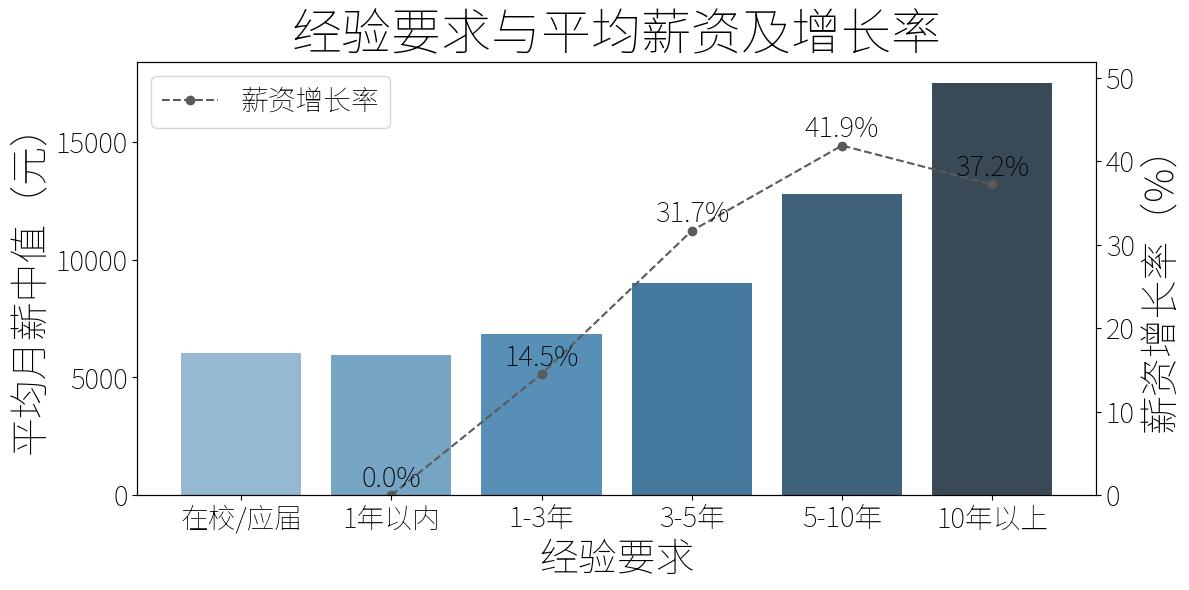

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 数据清洗与分组
df1 = df.dropna(subset=['经验要求'])

experience_order = [
    '在校/应届', '1年以内', '1-3年', '3-5年', '5-10年', '10年以上'
]
grouped = df1.groupby('经验要求')['月薪中值'].mean().reindex(experience_order)

# 计算增长率（百分比形式）
growth_rate = grouped.pct_change() * 100

# 将“1年以内”的增长率设置为 0
growth_rate.loc['1年以内'] = 0

# 创建图表和双 Y 轴
fig, ax1 = plt.subplots(figsize=(12, 6))

# 左轴：柱状图（平均薪资）
sns.barplot(x=grouped.index, y=grouped.values, palette='Blues_d', ax=ax1)
ax1.set_ylabel('平均月薪中值（元）', fontsize=28)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlabel('经验要求', fontsize=28)
ax1.set_title('经验要求与平均薪资及增长率', fontsize=36)

# 右轴：增长率折线图
ax2 = ax1.twinx()
ax2.plot(growth_rate.index, growth_rate.values, color='#5a5a5a', marker='o', linestyle='--', label='薪资增长率')
ax2.set_ylabel('薪资增长率（%）', fontsize=28, color='black')
ax2.tick_params(axis='y', labelsize=20, colors='black')

# 在折线上加上数值
for i, (x, y) in enumerate(zip(growth_rate.index, growth_rate.values)):
    if pd.notna(y):
        ax2.text(i, y + 1, f"{y:.1f}%", color='black', ha='center', fontsize=20)

# 设置 x 轴标签样式
ax1.set_xticklabels(experience_order, fontsize=20, rotation=0)

# 图例与布局
ax2.legend(loc='upper left', fontsize=20)
ax2.set_ylim(0, growth_rate.max() + 10)
plt.tight_layout()
plt.savefig("经验要求与平均薪资及增长率.png", dpi=300)
plt.show()

### 学历与薪资相关性分析

In [29]:
## 分析“学历要求”和“薪资”的相关性
## 皮尔逊相关系数衡量两个变量的线性相关性，范围在 [-1, 1] 之间：


# 只保留非空值
df1 = df[['学历要求分类', '月薪中值']].dropna()

# 计算皮尔逊相关系数
pearson_corr = df1['学历要求分类'].corr(df1['月薪中值'], method='pearson')
print(f'皮尔逊相关系数（学历要求 vs 薪资）: {pearson_corr:.4f}')

# Spearman 等级相关性（适合排序变量）
spearman_corr = df1['学历要求分类'].corr(df1['月薪中值'], method='spearman')
print(f'Spearman 等级相关系数（学历要求 vs 薪资）: {spearman_corr:.4f}')

皮尔逊相关系数（学历要求 vs 薪资）: 0.0503
Spearman 等级相关系数（学历要求 vs 薪资）: 0.0832


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


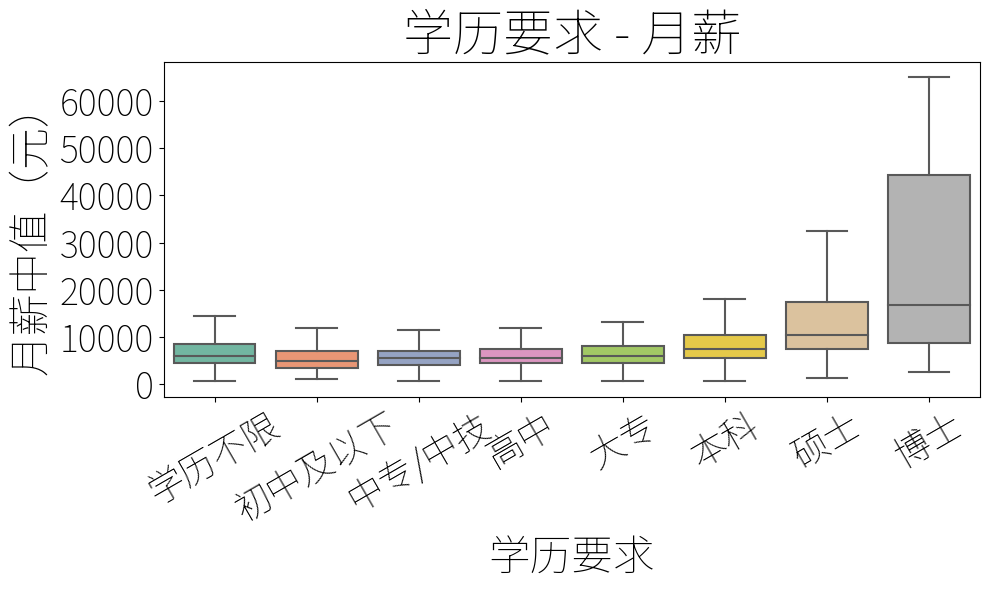

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 删除 '学历要求' 为空的记录，并复制为 df1
df1 = df.dropna(subset=['学历要求'])

# 2. 自定义学历要求的顺序
education_order = ['学历不限', '初中及以下', '中专/中技', '高中', '大专', '本科', '硕士', '博士']

# 3. 将学历要求列转换为有序的类别类型，确保按照顺序排序
df1['学历要求'] = pd.Categorical(df1['学历要求'], categories=education_order, ordered=True)

# 4. 绘制学历要求与月薪中值的箱线图
plt.figure(figsize=(10, 6))
sns.boxplot(x='学历要求', y='月薪中值', data=df1, palette='Set2', showfliers=False)

# 5. 设置图表标题和标签
plt.title('学历要求 - 月薪', fontsize=36)
plt.xlabel('学历要求', fontsize=30)
plt.ylabel('月薪中值（元）', fontsize=30)

# 6. 显示图表
plt.xticks(rotation=30, fontsize=26)  # 使 x 轴标签更加清晰
plt.yticks(fontsize=26)
plt.tight_layout()
plt.savefig("薪资学历要求.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

# 7. 计算学历要求与月薪中值的中位数
#correlation = df1.groupby('学历要求')['月薪中值'].median()

# 输出各学历要求对应的薪资中位数
#formatted_correlation = correlation.apply(lambda x: f'{x:,.0f}元')
#print(f"各学历要求对应的薪资中位数：\n{formatted_correlation}")

### 3.2 薪资词云图

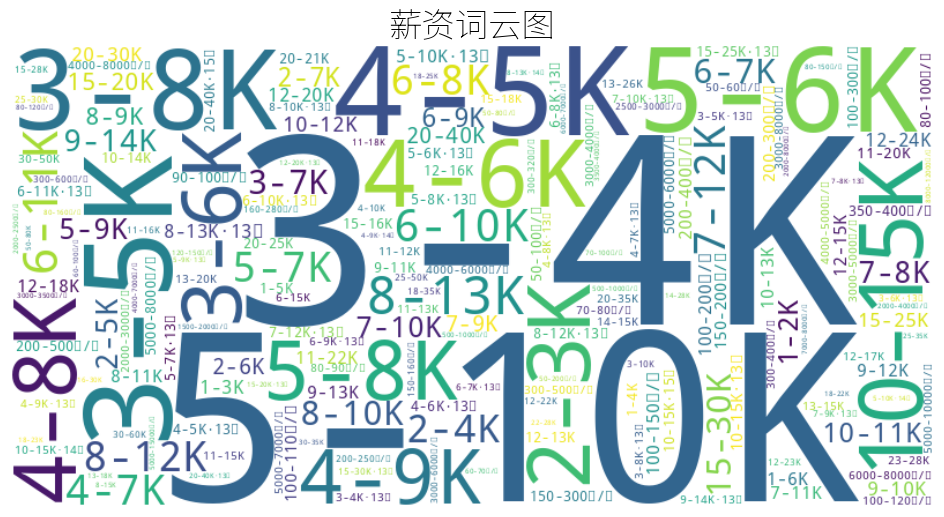

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 1. 清理并统计频数
df1 = df['薪资'].dropna().astype(str).value_counts().to_dict()

# 2. 生成词云（使用频率，不进行分词）
wordcloud = WordCloud(
    #font_path='msyh.ttc',  # 中文字体
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(df1)

# 3. 显示词云
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('薪资词云图', fontsize=24)
plt.savefig("薪资词云图.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 3.3 职位描述词云图

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.890 seconds.
Prefix dict has been built successfully.


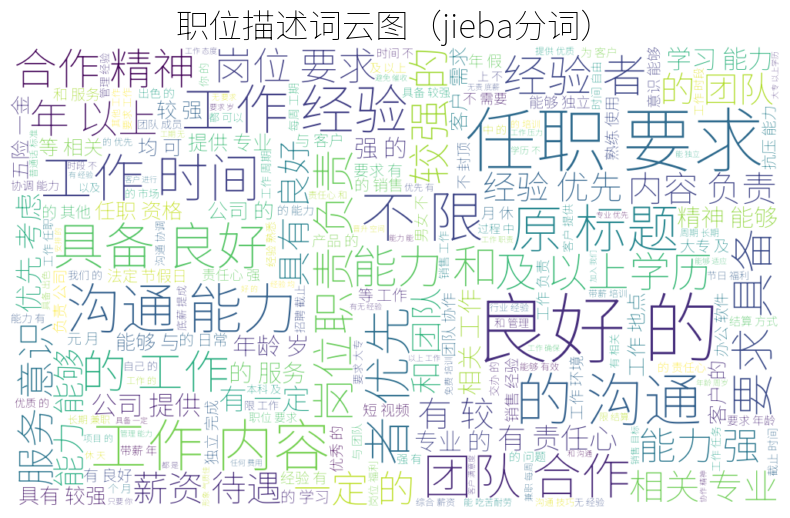

In [32]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 合并所有职位描述为一个长文本
text = ' '.join(df['职位描述'].dropna().astype(str))

# 2. 使用 jieba 分词
words = jieba.cut(text)
cut_text = ' '.join(words)  # WordCloud 需要用空格分开的字符串

# 3. 创建词云对象
wordcloud = WordCloud(
    font_path='/kaggle/input/chinese-fonts/NotoSansSC-VariableFont_wght.ttf',  # 中文字体路径（Windows一般是微软雅黑）
    width=1000,
    height=600,
    background_color='white',
    max_words=200,          # 显示的词语数量
    max_font_size=100       # 最大字体大小
).generate(cut_text)

# 4. 显示词云
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('职位描述词云图（jieba分词）', fontsize=24)
plt.savefig("职位描述词云图（jieba分词）.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 3.4 薪资与公司规模

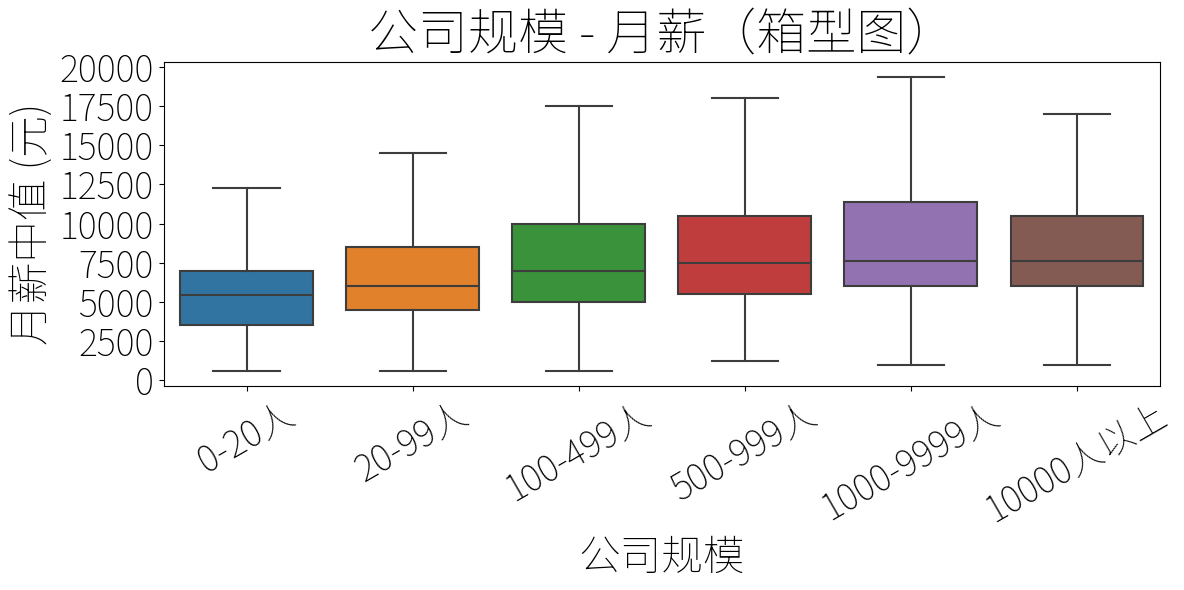

In [55]:
import seaborn as sns

order = ['0-20人', '20-99人', '100-499人', '500-999人', '1000-9999人', '10000人以上']

# 绘制箱型图
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='公司规模', y='月薪中值', order=order, showfliers=False)

plt.title('公司规模 - 月薪（箱型图）', fontsize=36)
plt.xlabel('公司规模', fontsize=30)
plt.ylabel('月薪中值 (元)', fontsize=30)
plt.xticks(rotation=30, fontsize=26)
plt.yticks(fontsize=26)
plt.tight_layout()
plt.savefig("公司规模 - 月薪（箱型图）.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 不同“工作经验”在招聘中的占比，绘制饼图

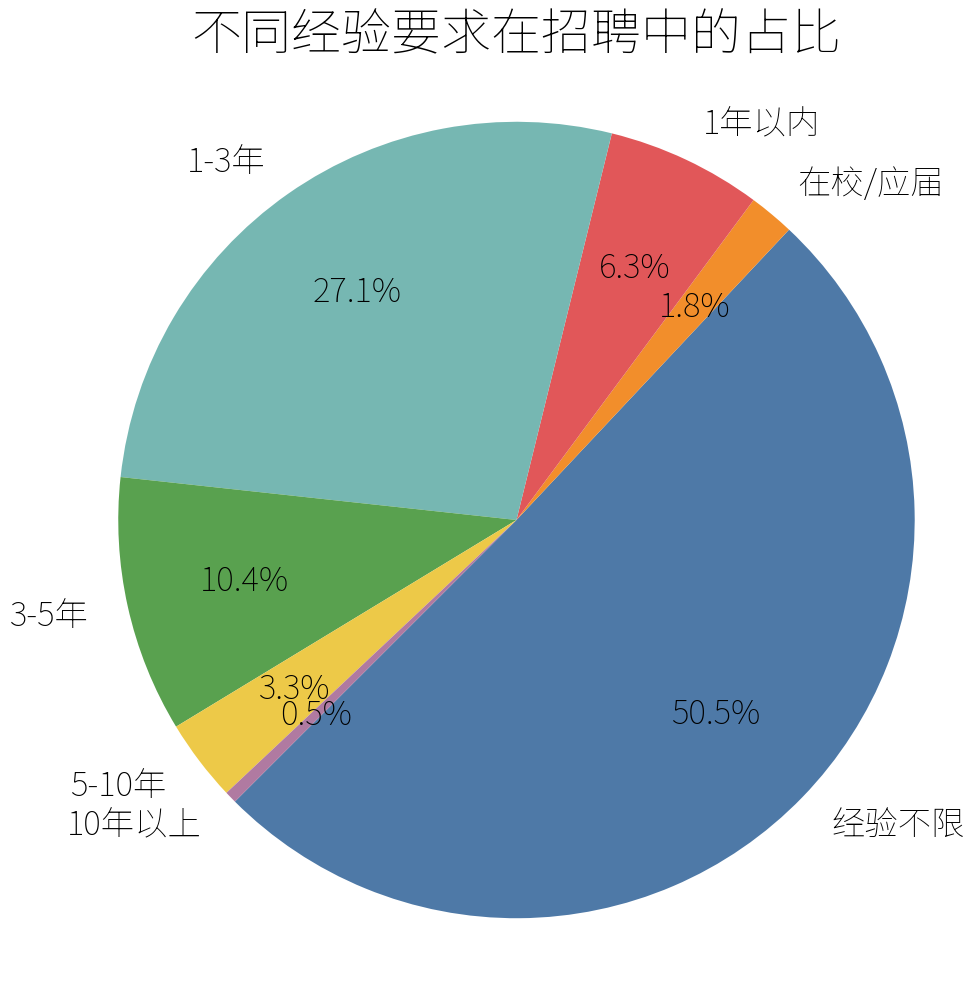

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# 保留需要的7个分类
valid_exps = [
    '经验不限',
    '在校/应届',
    '1年以内',
    '1-3年',
    '3-5年',
    '5-10年',
    '10年以上'
]
df = df[df['经验要求'].isin(valid_exps)]

# 统计 & 计算占比
exp_counts = df['经验要求'].value_counts().reindex(valid_exps)
exp_percent = exp_counts / exp_counts.sum()

# 自定义配色
colors = [
    '#4E79A7', '#F28E2B', '#E15759',
    '#76B7B2', '#59A14F', '#EDC948', '#B07AA1'
]

# 绘图
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(
    exp_percent,
    labels=exp_percent.index,
    autopct='%1.1f%%',
    startangle=225,
    colors=colors,
    textprops={'fontsize': 24},
    labeldistance=1.1,  # 调整外部标签距离圆心的距离
    pctdistance=0.7    # 调整百分比文本距离圆心的距离
)
plt.title('不同经验要求在招聘中的占比', fontsize=36)
plt.axis('equal')
plt.tight_layout()
plt.savefig("不同经验要求在招聘中的占比.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 不同“公司行业”在招聘中的占比，绘制饼图

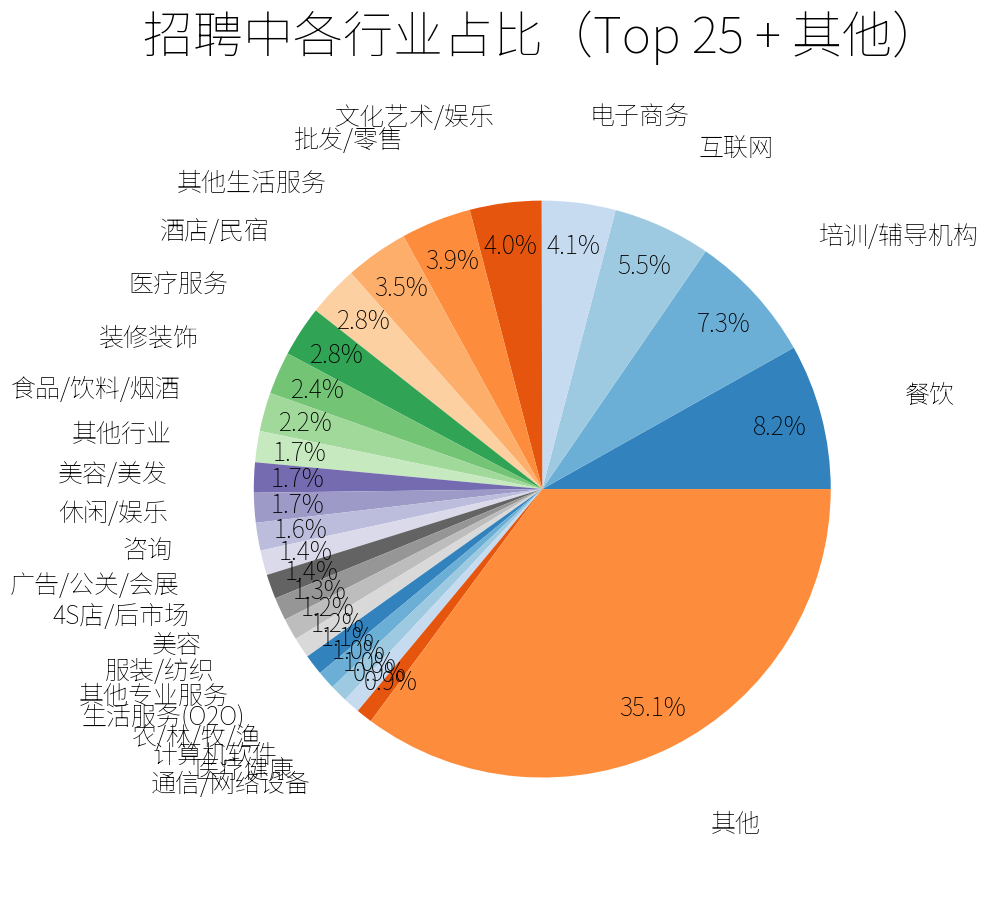

In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 统计行业出现次数
industry_counts = df['公司行业'].value_counts()

# 2. 获取前30的行业
top30 = industry_counts[:25]

# 3. 计算“其他”的数量
other = industry_counts[25:].sum()

# 4. 合并前30和“其他”
industry_final = pd.concat([top30, pd.Series({'其他': other})])

# 5. 计算占比
industry_percent = industry_final / industry_final.sum()

# 6. 使用 tab20c 配色
colors = plt.cm.tab20c.colors[:len(industry_percent)]

# 7. 绘制饼图
plt.figure(figsize=(10, 10))
plt.pie(
    industry_percent,
    labels=industry_percent.index,
    autopct='%1.1f%%',
    startangle=0,
    colors=colors,
    textprops={'fontsize': 18},
    labeldistance=1.2,  # 调整外部标签距离圆心的距离
    pctdistance=0.85
)
plt.title('招聘中各行业占比（Top 25 + 其他）', fontsize=36)
plt.axis('equal')
plt.tight_layout()
plt.savefig("招聘中各行业占比（Top 25 + 其他）.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 不同“公司行业”在招聘中的平均薪资，绘制柱状图

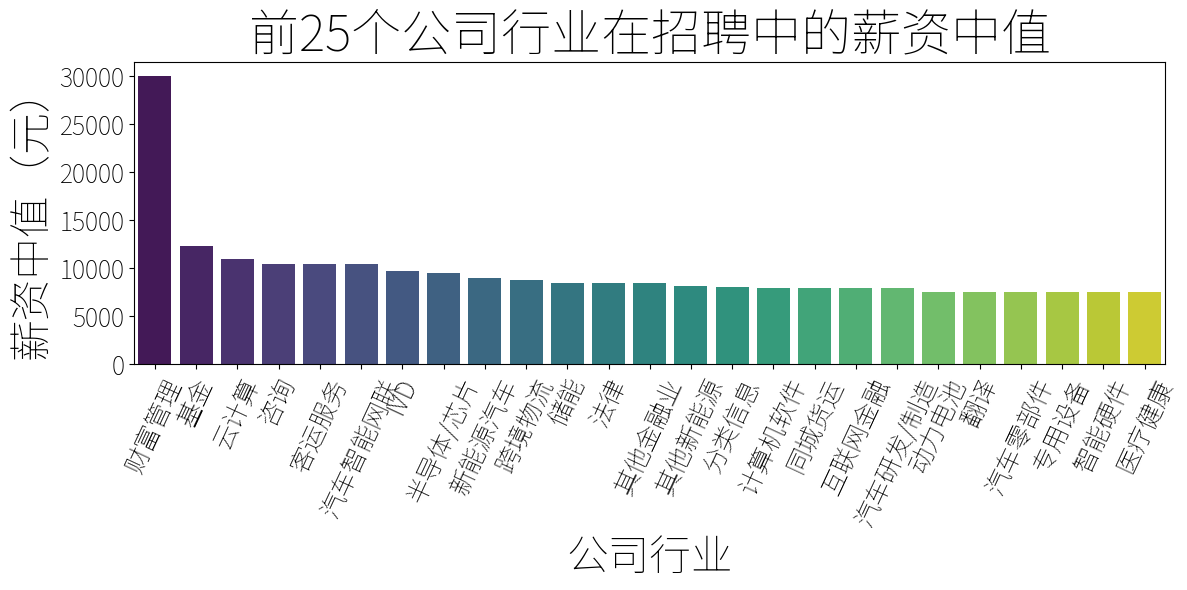

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你的DataFrame为 df，且有“公司行业”和“薪资中值”列
# 如果“薪资中值”列包含范围值，需要先进行处理，如上一个示例中的方法

# 1. 按公司行业分组，计算薪资中值
industry_salary_median = df.groupby('公司行业')['月薪中值'].median().sort_values(ascending=False)

# 2. 只选择前30个行业
industry_salary_median_top30 = industry_salary_median.head(25)

# 3. 绘制柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_salary_median_top30.index, y=industry_salary_median_top30.values, palette='viridis')

# 4. 添加标题和标签
plt.xticks(rotation=65, fontsize=18)  # 如果行业名称较长，可以旋转x轴标签
plt.yticks(fontsize=18)
plt.xlabel('公司行业', fontsize=30)
plt.ylabel('薪资中值（元）', fontsize=30)
plt.title('前25个公司行业在招聘中的薪资中值', fontsize=36)
plt.tight_layout()
plt.savefig("前25个公司行业在招聘中的薪资中值.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 看看哪个”公司规模“在招聘中占比最大

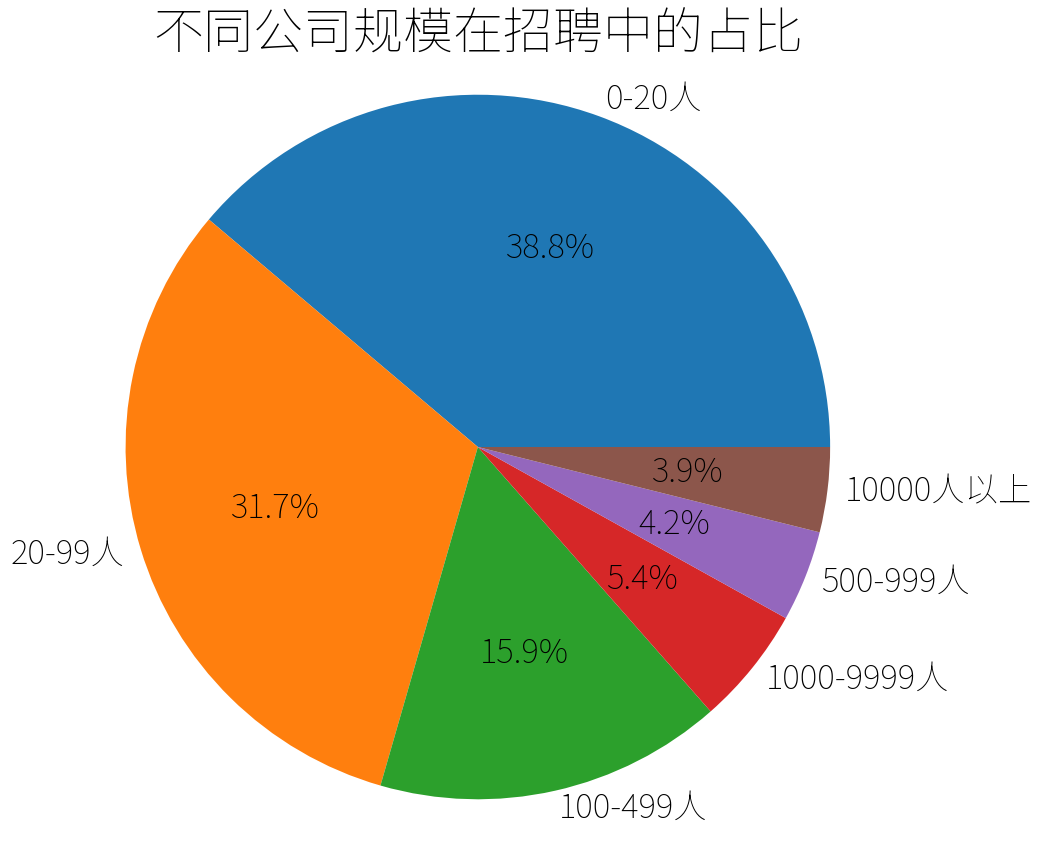

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 统计各公司规模的数量
company_size_counts = df['公司规模'].value_counts()

# 2. 计算各公司规模的占比
company_size_percent = company_size_counts / company_size_counts.sum()

# 3. 绘制饼图
plt.figure(figsize=(10, 10))
plt.pie(company_size_percent, 
        labels=company_size_percent.index, 
        autopct='%1.1f%%', 
        startangle=0, 
        textprops={'fontsize': 24},
        labeldistance=1.05)  # 调整外部标签距离圆心的距离
plt.title('不同公司规模在招聘中的占比', fontsize=36)
plt.axis('equal')  # 保证是圆形
plt.savefig("不同公司规模在招聘中的占比.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 提取“招聘职位”关键字，绘制云图

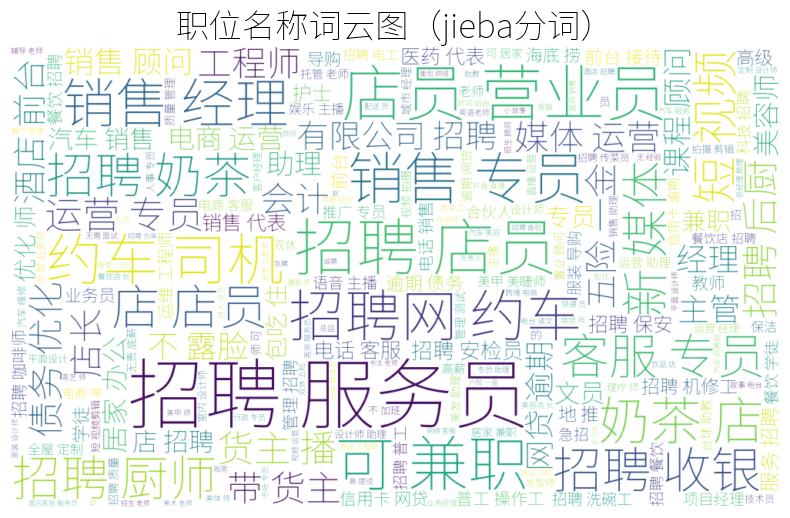

In [38]:
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. 合并所有职位描述为一个长文本
text = ' '.join(df['职位名称'].dropna().astype(str))

# 2. 使用 jieba 分词
words = jieba.cut(text)
cut_text = ' '.join(words)  # WordCloud 需要用空格分开的字符串

# 3. 创建词云对象
wordcloud = WordCloud(
    font_path='/kaggle/input/chinese-fonts/NotoSansSC-VariableFont_wght.ttf',  # 中文字体路径（Windows一般是微软雅黑）
    width=1000,
    height=600,
    background_color='white',
    max_words=200,          # 显示的词语数量
    max_font_size=100       # 最大字体大小
).generate(cut_text)

# 4. 显示词云
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('职位名称词云图（jieba分词）', fontsize=24)
plt.savefig("职位名称词云图（jieba分词）.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 计算各城市招聘薪资平均数，绘制地图热力图

In [39]:
!pip install pyecharts

import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

# 1. 城市到省份的映射表（示例，需根据你数据实际情况补充完整）
city_to_province = {
    '北京': '北京市', '上海': '上海市', '广州': '广东省', '深圳': '广东省', '杭州': '浙江省',
    '南京': '江苏省', '武汉': '湖北省', '成都': '四川省', '重庆': '重庆市', '天津': '天津市',
    # 可继续补充其它城市映射...
}

# 2. 映射“发布城市”到省份
df['省份'] = df['发布城市'].map(city_to_province)

# 3. 删除映射失败的城市（即省份为空的）
df_map = df.dropna(subset=['省份'])

# 4. 计算每个省份的平均薪资
province_salary = df_map.groupby('省份')['月薪中值'].mean().round(0)

# 5. 准备地图数据
map_data = list(zip(province_salary.index.tolist(), province_salary.values.tolist()))

# 6. 绘制中国地图热力图
map_chart = (
    Map()
    .add("平均月薪中值", map_data, "china")
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各省平均月薪中值热力图"),
        visualmap_opts=opts.VisualMapOpts(
            min_=province_salary.min(),
            max_=province_salary.max(),
            is_piecewise=True,
            pieces=[
                {"min": 40000, "label": ">40000", "color": "#7f1100"},
                {"min": 30000, "max": 40000, "label": "30k-40k", "color": "#ff5428"},
                {"min": 20000, "max": 30000, "label": "20k-30k", "color": "#ff8c71"},
                {"min": 10000, "max": 20000, "label": "10k-20k", "color": "#ffd768"},
                {"min": 0, "max": 10000, "label": "<10k", "color": "#90ee90"},
            ]
        )
    )
)

# 7. 渲染输出（Jupyter 内可用）
map_chart.render_notebook()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.7/153.7 kB 3.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 5.9 MB/s eta 0:00:00


### 分析不同城市，要求“本科以上”占比，看看哪个城市是学历控（可以仅分析北上广深航等几个重点城市）

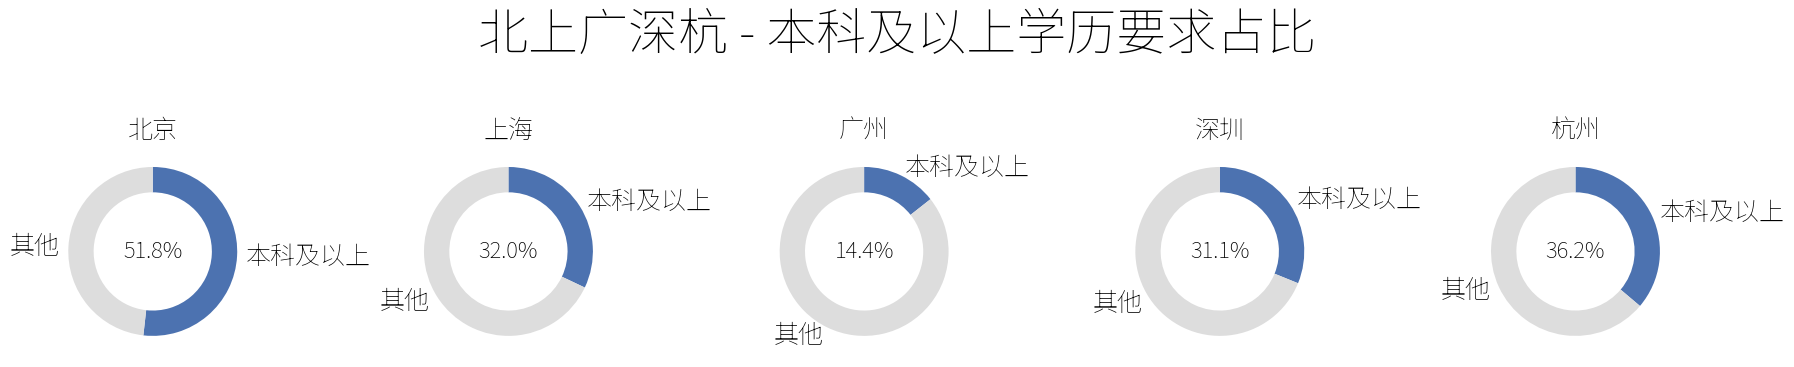

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 重点城市
cities = ['北京', '上海', '广州', '深圳', '杭州']
target_degrees = ['本科', '硕士', '博士']

# 设置画布
fig, axes = plt.subplots(1, len(cities), figsize=(18, 4))

for i, city in enumerate(cities):
    city_df = df[df['发布城市'] == city]
    total = len(city_df)
    
    # 本科及以上
    count_bk = city_df['学历要求'].isin(target_degrees).sum()
    percent_bk = count_bk / total * 100
    
    # 饼图数据
    sizes = [percent_bk, 100 - percent_bk]
    labels = ['本科及以上', '其他']
    colors = ['#4C72B0', '#DDDDDD']
    
    # 画图
    wedges, texts, autotexts = axes[i].pie(
        sizes,
        labels=labels,
        colors=colors,
        startangle=90,
        counterclock=False,
        wedgeprops={'width': 0.3},
        autopct='',
        textprops={'fontsize': 18}
    )
    
    # 添加中间文字
    axes[i].text(0, 0, f"{percent_bk:.1f}%", ha='center', va='center', fontsize=16, fontweight='bold')
    axes[i].set_title(city, fontsize=18)

# 总体布局
plt.suptitle("北上广深杭 - 本科及以上学历要求占比", fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.92])
#plt.title('北上广深杭 本科及以上学历要求 占比', fontsize=24)
plt.savefig("北上广深杭 - 本科及以上学历要求占比.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 分析不同城市，要求“经验不限”占比，看看哪个城市最看重经验，哪个城市对新人最友好（可以仅分析北上广深航等几个重点城市）

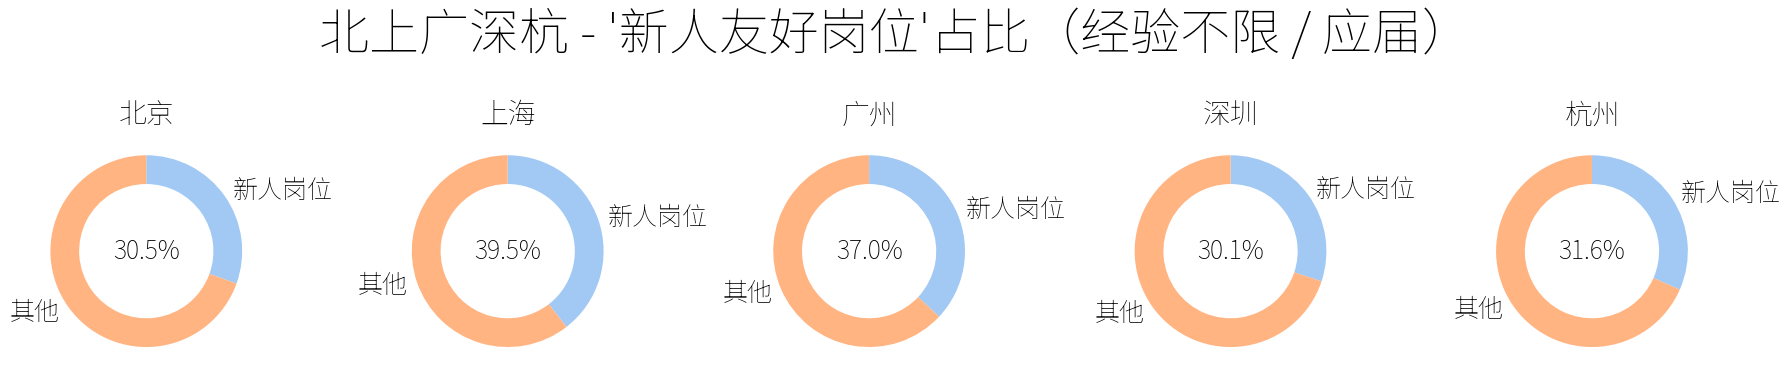

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 城市列表
cities = ['北京', '上海', '广州', '深圳', '杭州']
colors = sns.color_palette("pastel")

# 创建图表
fig, axes = plt.subplots(1, len(cities), figsize=(18, 4))

# 新人定义
newbie_keywords = ['经验不限', '在校/应届']

for i, city in enumerate(cities):
    city_df = df[df['发布城市'] == city]
    total = len(city_df)
    count = city_df['经验要求'].isin(newbie_keywords).sum()
    percent = count / total * 100 if total > 0 else 0  # 避免除0
    
    # 饼图数据
    values = [percent, 100 - percent]
    labels = ['新人岗位', '其他']
    
    wedges, texts, autotexts = axes[i].pie(
        values,
        labels=labels,
        colors=colors,
        startangle=90,
        counterclock=False,
        wedgeprops={'width': 0.3},
        autopct='',
        textprops={'fontsize': 18}
    )
    
    # 中心百分比文字
    axes[i].text(0, 0, f"{percent:.1f}%", ha='center', va='center', fontsize=18, fontweight='bold')
    axes[i].set_title(city, fontsize=20)

plt.suptitle("北上广深杭 - '新人友好岗位'占比（经验不限 / 应届）", fontsize=36)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig("新人友好岗位占比.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 对比不同城市不同“经验要求”的平均公司，看看哪个城市成长性更好（可以仅分析北上广深航等几个重点城市）

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

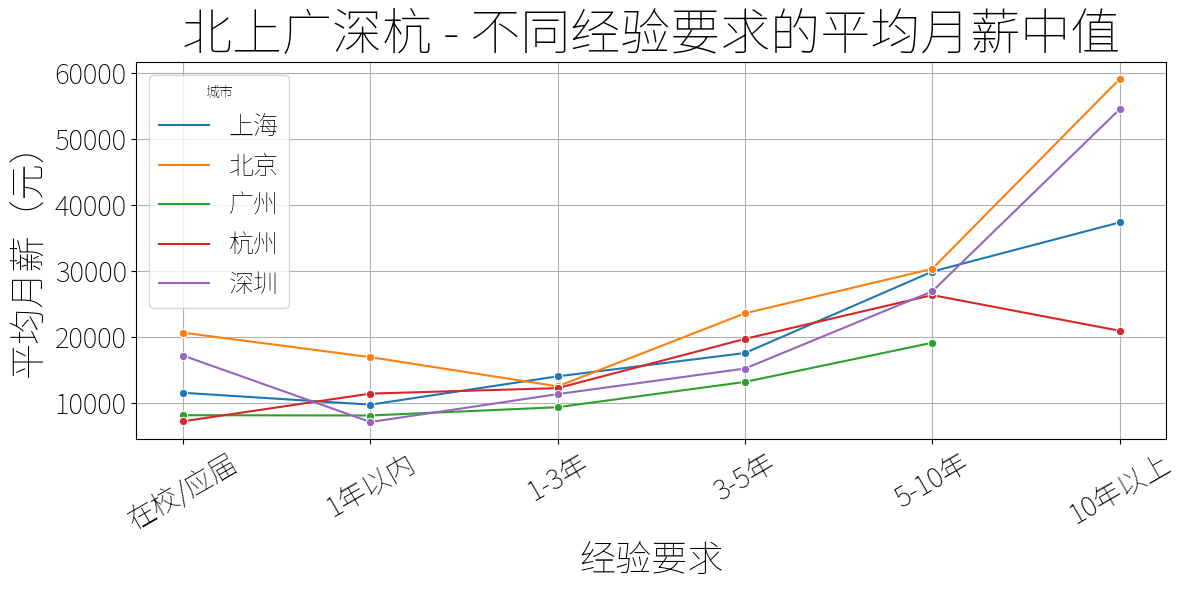

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm

font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 标准经验顺序
experience_order = ['在校/应届', '1年以内', '1-3年', '3-5年', '5-10年', '10年以上']

# 重点城市
cities = ['北京', '上海', '广州', '深圳', '杭州']

# 筛选
df_filtered = df[df['发布城市'].isin(cities) & df['经验要求'].isin(experience_order)]

# 分组取平均薪资
grouped = df_filtered.groupby(['发布城市', '经验要求'])['月薪中值'].mean().reset_index()

# 排序经验等级
grouped['经验要求'] = pd.Categorical(grouped['经验要求'], categories=experience_order, ordered=True)
grouped = grouped.sort_values(['发布城市', '经验要求'])

# 绘图
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='经验要求', y='月薪中值', hue='发布城市', marker='o', palette='tab10')

plt.title("北上广深杭 - 不同经验要求的平均月薪中值", fontsize=36)
plt.xticks(rotation=30, fontsize=20)  # 如果行业名称较长，可以旋转x轴标签
plt.yticks(fontsize=20)
plt.xlabel("经验要求", fontsize=26)
plt.ylabel("平均月薪（元）", fontsize=26)
plt.grid(True)
plt.legend(title="城市", fontsize=18)
plt.tight_layout()
plt.savefig("北上广深杭 - 不同经验要求的平均月薪中值.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 分析不同城市的房价，看看”应届毕业生“需要工作多少个月才能购买一平米房子（可以仅分析北上广深航等几个重点城市）

### 分析不同城市的房价，看看房租占”应届毕业生“收入的百分比（可以仅分析北上广深航等几个重点城市）

### 北上广深杭五个城市的薪资中位数与全国薪资中位数对比

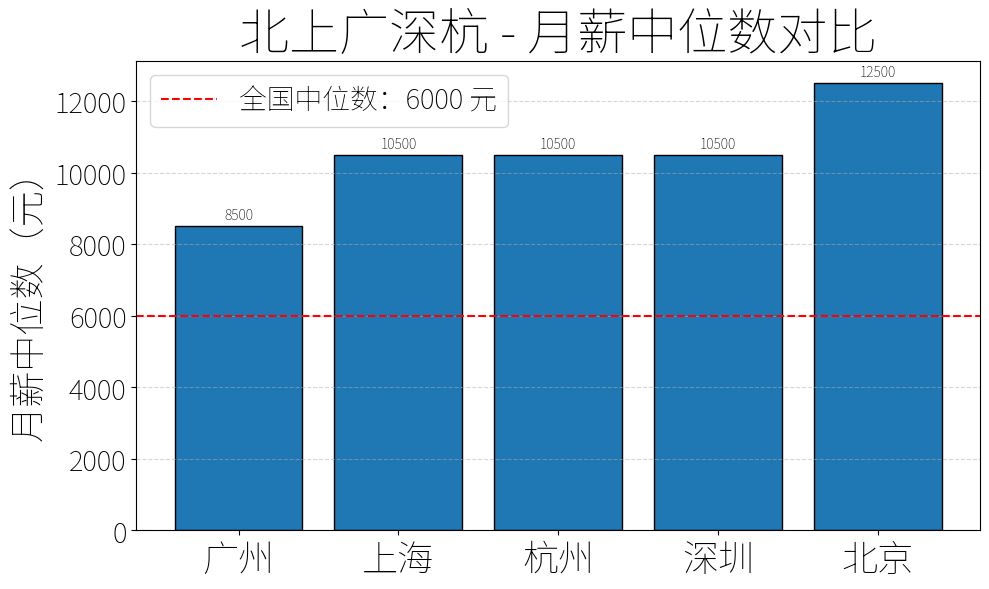

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# 重点城市列表
cities = ['北京', '上海', '广州', '深圳', '杭州']

# 1. 筛选重点城市数据
df_focus = df[df['发布城市'].isin(cities)]

# 2. 计算重点城市的薪资中位数
city_medians = df_focus.groupby('发布城市')['月薪中值'].median().sort_values()

# 3. 计算全国中位数
national_median = df['月薪中值'].median()

# 4. 绘图
plt.figure(figsize=(10, 6))
bars = plt.bar(city_medians.index, city_medians.values, edgecolor='black')

# 5. 绘制全国基准线
plt.axhline(national_median, color='red', linestyle='--', label=f'全国中位数：{national_median:.0f} 元')

# 6. 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 200, f'{int(height)}', ha='center', fontsize=10)

# 7. 图表设置
plt.title('北上广深杭 - 月薪中位数对比', fontsize=36)
plt.xticks(fontsize=26)  # 如果行业名称较长，可以旋转x轴标签
plt.yticks(fontsize=20)
plt.ylabel('月薪中位数（元）', fontsize=26)
plt.legend(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("北上广深杭 - 月薪中位数对比.png", dpi=300)  # dpi 设置图像分辨率
plt.show()

### 列出北上广深杭等重点城市，薪资最高的10家公司

In [44]:
import pandas as pd

# 定义重点城市
cities = ['北京', '上海', '广州', '深圳', '杭州']

# 遍历每个城市分别列出前10公司
for city in cities:
    print(f"\n🏙️ {city} - 平均月薪中值 Top 10 公司：")
    
    # 筛选当前城市
    city_df = df[df['发布城市'] == city]
    
    # 按公司分组求平均薪资
    top10 = (
        city_df.groupby('公司名称')['月薪中值']
        .mean()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )
    
    # 格式美化输出
    top10.columns = ['公司名称', '平均月薪中值']
    print(top10.to_string(index=False))


🏙️ 北京 - 平均月薪中值 Top 10 公司：
     公司名称       平均月薪中值
       华为 70000.000000
      小红书 66667.000000
     京东集团 66180.666667
  北京爱学思技术 65000.000000
      作业帮 65000.000000
人形机器人创新中心 64167.000000
 沃东天骏信息技术 63750.000000
     数美万物 62500.000000
     高德云图 60000.000000
  MiniMax 60000.000000

🏙️ 上海 - 平均月薪中值 Top 10 公司：
    公司名称  平均月薪中值
  北京字节跳动 81250.0
   太平洋保险 75000.0
    此芯科技 73333.0
    星纪魅族 71875.0
    斯威夫特 65000.0
    传音控股 64167.0
上海从鲸信息技术 60000.0
      小米 56666.5
     凯芮沃 53333.5
    上海敬游 52500.0

🏙️ 广州 - 平均月薪中值 Top 10 公司：
      公司名称  平均月薪中值
  异惑传媒有限公司 40000.0
     章光101 37500.0
     琪薇新零售 30000.0
        坤荣 30000.0
  广州市瑞优讯科技 30000.0
    博润医院管理 30000.0
 广州香满汇生物科技 30000.0
湖南鸣鸣很忙商业连锁 29166.5
  广州臻亿电子商务 27500.0
    柚乐网络科技 27083.5

🏙️ 深圳 - 平均月薪中值 Top 10 公司：
 公司名称  平均月薪中值
   小米 86667.0
  金智维 65000.0
SHEIN 58333.5
 万兴科技 50000.0
   荣耀 46875.0
 迅雷网络 46875.0
 拓竹科技 46875.0
 速腾聚创 45000.0
   腾讯 43750.0
 盈泰利华 42500.0

🏙️ 杭州 - 平均月薪中值 Top 10 公司：
       公司名称  平均月薪中值
       蚂蚁集团 66667.0
 杭州罗博网联信息技术 66666.5
  